# Heart Disease Classification

## Business Goal

We'll be working with the largest hospital in Massachusetts (The Massachusetts General Hospital). Using various classification algorithms, we'll determine which algorithm provides the most accurate predictions for whether a patient is at risk in 10 years for coronary heart disease (CHD). This will in turn help the hospital create a treatment/preventative plan for at-risk patients early on, and hopefully prevent CHD from developing.    

## Data

The Framingham Heart Study (https://www.framinghamheartstudy.org/fhs-about/) is a long term, ongoing study on cardiovascular disease (CVD). Started in 1948, the study looked at numerous factors such as age, gender, cholesterol levels, etc, and would eventually lead to the identification of several CVD risk factors. We'll be using the data from this study, which contains behavioral, demographical and medical variables (A full list and description of each variable can be found in the README file).

### Preprocessing Our Data ###

In [1]:
import pandas as pd

#Let's look at our data
df = pd.read_csv("Framingham.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


In [2]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#Let's convert BPMeds from a float to an int
df["BPMeds"] = df["BPMeds"].astype("int64")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   int64  
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 516.8 KB


In [5]:
##Let's check for null values

df.isnull().sum()


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
#Let's check for duplicates
df.drop_duplicates(inplace = True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


### Splitting The Data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Our target variable is TenYearCHD
X = df.drop("TenYearCHD", axis = 1)
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

#Let's scale our data
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [8]:
#Let's take a look at our value counts for our target "TenYearCHD"
df["TenYearCHD"].value_counts()

0    3505
1     628
Name: TenYearCHD, dtype: int64

**It looks like our data is imbalanced, so let's use SMOTE to resample.**

In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)

## The Algorithms

Using three different classification algorithms, we'll look at how well our models can predict whether a patient is at risk (in  10 years) for CVD. We'll use logistic regression as a base model, then use a Decision Tree algorithm, then finally build upon our Decision Tree with a Random Forest algorithm. After running our base models, we'll attempt to improve upon our Decision Tree and Random Forest algorithms.

### Logistic Regression

In [10]:
#Let's build a logistic regression model
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(solver = "saga")

#Fit our model and predict
baseline_model.fit(X_train, y_train)
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      2628
           1       0.67      0.68      0.68      2628

    accuracy                           0.68      5256
   macro avg       0.68      0.68      0.68      5256
weighted avg       0.68      0.68      0.68      5256



In [12]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       877
           1       0.28      0.66      0.39       157

    accuracy                           0.69      1034
   macro avg       0.60      0.68      0.59      1034
weighted avg       0.82      0.69      0.73      1034



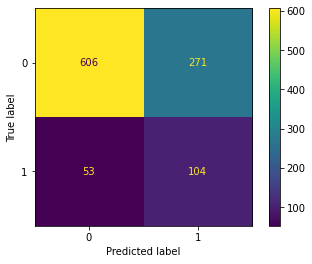

In [13]:
#Let's create a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(baseline_model, X_test, y_test);

**We can see that our model is slightly overfitting, but let's take a look at our classification summary results.**

For our test model class 1 (meaning the patient is at risk for coronary heart disease) we have a precision score of .28, a recall score of .70, and an f1 score of .39. This means that:

* Out of all the patients that the model predicted would be at risk for CHD, 28% were actually at risk.
* Out of all the patients that were at risk for CHD, the model correctly predicted 70% of them
* Our model has a low f1 score, indicating poor performance on predicting risk of CHD.

**We can also see the true negative, false negative, false positive and true positive values for our test model (from our confusion matrix), where:**

* 587 patients were correctly predicted as not being at risk for CHD
* 47 patients were wrongly predicted as not being at risk for CHD
* 290 patients were wrongly predicted as being at risk for CHD
* 110 patients were correctly predicted as being at risk for CHD

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "entropy")

#Fit our model and predict
dtc.fit(X_train, y_train)
dtc_train_pred = dtc.predict(X_train)
dtc_test_pred = dtc.predict(X_test)


In [15]:
print(classification_report(y_train, dtc_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00      2628

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256



In [16]:
print(classification_report(y_test, dtc_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       877
           1       0.22      0.33      0.26       157

    accuracy                           0.72      1034
   macro avg       0.54      0.56      0.55      1034
weighted avg       0.77      0.72      0.74      1034



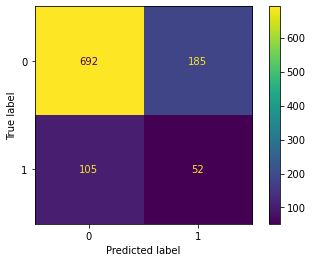

In [17]:
plot_confusion_matrix(dtc, X_test, y_test);

**This time our model is greatly overfitting. Let's take a look at our classification report results**

For our test model class 1 (meaning the patient is at risk for coronary heart disease) we have a precision score of .20, a recall score of .29, and an f1 score of .24, meaning: 

* Out of all the patients that the model predicted would be at risk for CHD, 20% were actually at risk.
* Out of all the patients that were at risk for CHD, the model correctly predicted 29% of them
* Our model has a low f1 score, indicating poor performance on predicting risk of CHD.


**Looking at our test model confusion matrix we can see that:**
* 691 patients were correctly predicted as not being at risk for CHD
* 111 patients were wrongly predicted as not being at risk for CHD
* 186 patients were wrongly predicted as being at risk for CHD
* 46 patients were correctly predicted as being at risk for CHD

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)


In [19]:
print(classification_report(y_train, rf_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00      2628

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256



In [20]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       877
           1       0.30      0.25      0.27       157

    accuracy                           0.80      1034
   macro avg       0.58      0.57      0.58      1034
weighted avg       0.78      0.80      0.79      1034



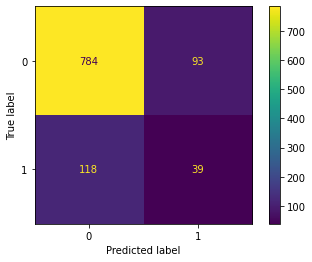

In [21]:
plot_confusion_matrix(rf, X_test, y_test);

**Again, our model is greatly overfitting. Let's take a look at our classification report results**

For our test model class 1 (meaning the patient is at risk for coronary heart disease) we have a precision score of .31, a recall score of .27, and an f1 score of .29, meaning:

* Out of all the patients that the model predicted would be at risk for CHD, 31% were actually at risk.
* Out of all the patients that were at risk for CHD, the model correctly predicted 27% of them
* Our model has a low f1 score, indicating poor performance on predicting risk of CHD.


**For our last model's confusion matrix we can see that:**
* 784 patients were correctly predicted as not being at risk for CHD
* 115 patients were wrongly predicted as not being at risk for CHD
* 93 patients were wrongly predicted as being at risk for CHD
* 42 patients were correctly predicted as being at risk for CHD

## Improving The Models

### 1) Decision Tree

We'll see how manipulating the **max_depth**, **min_samples_split**, and **min_samples_leaf** hyperparameters in our decision tree model will affect our evaluation metrics.



### max_depth ###

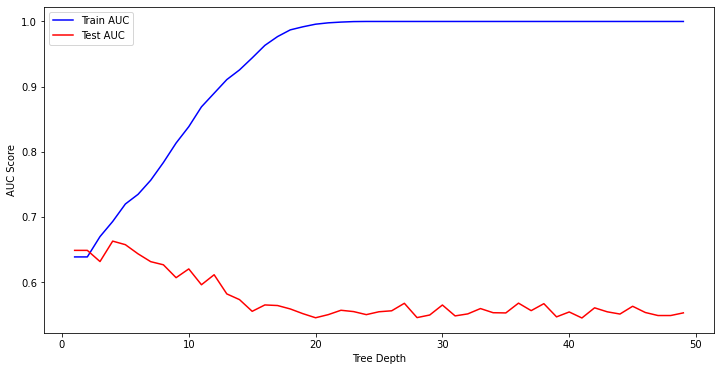

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Let's plot our ROC curve

max_depths = list(range(1,50))
train_results = []
test_results = []

for depth in max_depths:
    dtc2 = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    dtc2.fit(X_train, y_train)
    dtc_pred2 = dtc2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dtc_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_dtc_pred = dtc2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dtc_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize = (12,6))
plt.plot(max_depths,train_results, "b", label = "Train AUC");
plt.plot(max_depths, test_results, "r", label = "Test AUC");
plt.ylabel("AUC Score");
plt.xlabel("Tree Depth");
plt.legend();

### min_samples_split ###

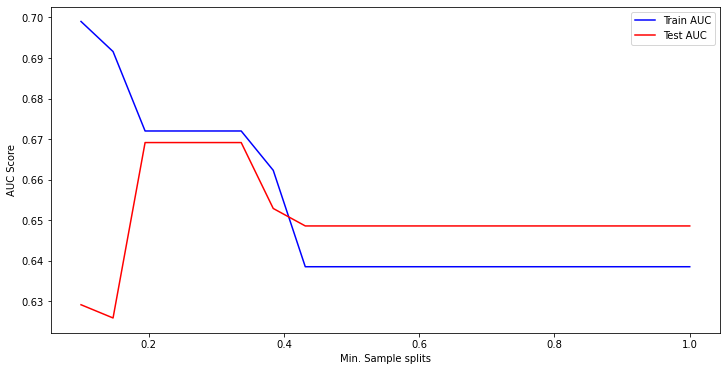

In [23]:
import numpy as np
min_samples_splits = np.linspace(0.1, 1.0, 20)
train_results = []
test_results = []
for min_samples in min_samples_splits:
    dtc2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples)
    dtc2.fit(X_train, y_train)
    dtc_pred2 = dtc2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dtc_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_dtc_pred = dtc2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dtc_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6));
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC');
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC');
plt.xlabel('Min. Sample splits');
plt.ylabel("AUC Score")
plt.legend();

### min_samples_leaf ###

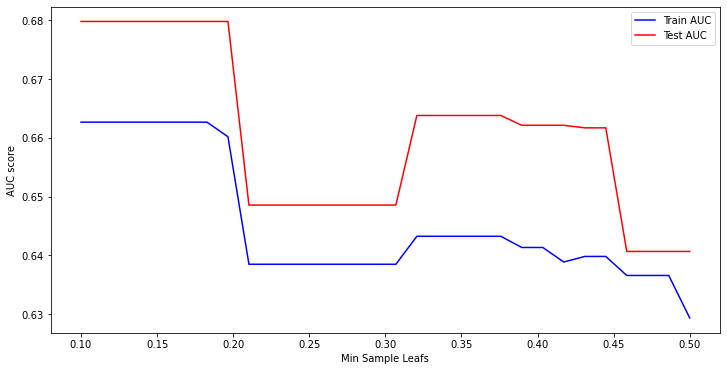

In [24]:
min_samples_leafs = np.linspace(0.1, .5, 30)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dtc2 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
    dtc2.fit(X_train, y_train)
    dtc_pred2 = dtc2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dtc_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_dtc_pred = dtc2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dtc_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min Sample Leafs')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

dtc3 = DecisionTreeClassifier()
#dtc3.fit(X_train, y_train)
#dtc3_pred = dtc3.predict(X_test)


param_grid = {
    'criterion': ['entropy'],
    'random_state': [1],
    'max_depth': [1, 2, 3, 4, 5, 6],
    'min_samples_split': [0.2, 0.25, 0.3, 0.35, 0.4 ],
    'min_samples_leaf': [0.1, 0.15, 0.20, .25, .30, .35, .40]
}


gs_tree = GridSearchCV(dtc3, param_grid)
gs_tree.fit(X_train, y_train)
gs_tree.best_params_


{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.2,
 'random_state': 1}

In [26]:
gs_tree_train_pred = gs_tree.predict(X_train)
print(classification_report(y_train, gs_tree_train_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      2628
           1       0.67      0.65      0.66      2628

    accuracy                           0.66      5256
   macro avg       0.66      0.66      0.66      5256
weighted avg       0.66      0.66      0.66      5256



In [27]:
gs_tree_test_pred = gs_tree.predict(X_test)
print(classification_report(y_test, gs_tree_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       877
           1       0.28      0.66      0.40       157

    accuracy                           0.70      1034
   macro avg       0.60      0.68      0.60      1034
weighted avg       0.82      0.70      0.74      1034



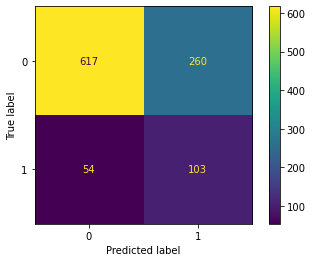

In [28]:
dt_model = gs_tree.best_estimator_
plot_confusion_matrix(dt_model, X_test, y_test);

### 2) Random Forest Classifier

In [46]:
rf2 = RandomForestClassifier()


rand_for_grid = {
    'n_estimators': [100, 150, 200],
    
    'random_state': [1],
    
    'max_depth': [5, 7, 10],
    
    'min_samples_split': [10, 20, 30],
    
    'min_samples_leaf': [0.2, .30, .50]
    
    
}

gs_forest = GridSearchCV(rf2, rand_for_grid)

gs_forest.fit(X_train, y_train)

gs_forest.best_params_

{'max_depth': 5,
 'min_samples_leaf': 0.2,
 'min_samples_split': 10,
 'n_estimators': 100,
 'random_state': 1}

In [47]:
gs_forest_train_pred = gs_forest.predict(X_train)
print(classification_report(y_train, gs_forest_train_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      2628
           1       0.66      0.65      0.66      2628

    accuracy                           0.66      5256
   macro avg       0.66      0.66      0.66      5256
weighted avg       0.66      0.66      0.66      5256



In [48]:
gs_forest_test_pred = gs_forest.predict(X_test)
print(classification_report(y_test, gs_forest_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       877
           1       0.27      0.65      0.38       157

    accuracy                           0.68      1034
   macro avg       0.59      0.67      0.58      1034
weighted avg       0.82      0.68      0.73      1034



In [50]:
#Let's tune the hyperparamters some more

rf3 = RandomForestClassifier()


rand_for_grid = {
    'n_estimators': [100, 150, 200],
    
     'random_state': [1],
    
    'max_depth': [3, 5, 7],
    
    'min_samples_split': [5, 10, 15],
    
    'min_samples_leaf': [0.1, .20, .30]
}

gs_forest_tune = GridSearchCV(rf3, rand_for_grid)
gs_forest_tune.fit(X_train, y_train)

gs_forest_tune.best_params_


{'max_depth': 5,
 'min_samples_leaf': 0.1,
 'min_samples_split': 5,
 'n_estimators': 100,
 'random_state': 1}

In [51]:
gs_forest_train_pred2 = gs_forest_tune.predict(X_train)
print(classification_report(y_train, gs_forest_train_pred2))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      2628
           1       0.68      0.69      0.68      2628

    accuracy                           0.68      5256
   macro avg       0.68      0.68      0.68      5256
weighted avg       0.68      0.68      0.68      5256



In [52]:
gs_forest_tune_pred = gs_forest_tune.predict(X_test )
print(classification_report(y_test, gs_forest_tune_pred))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       877
           1       0.28      0.67      0.39       157

    accuracy                           0.69      1034
   macro avg       0.60      0.68      0.59      1034
weighted avg       0.82      0.69      0.73      1034



In [35]:
rf4 = RandomForestClassifier()


rand_for_grid = {
    'n_estimators': [100, 150, 200],
    
     'random_state': [1],
    
    'max_depth': [3, 5, 7],
    
    'min_samples_split': [3, 4, 6, 8]
    
}

gs_forest_tune2 = GridSearchCV(rf4, rand_for_grid)
gs_forest_tune2.fit(X_train, y_train)

gs_forest_tune2.best_params_

#gs_forest_tune_pred = gs_forest_tune.predict(X_test)

{'max_depth': 7,
 'min_samples_split': 3,
 'n_estimators': 200,
 'random_state': 1}

In [36]:
gs_forest_train_pred3 = gs_forest_tune2.predict(X_train)
print(classification_report(y_train, gs_forest_train_pred3))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2628
           1       0.81      0.83      0.82      2628

    accuracy                           0.82      5256
   macro avg       0.82      0.82      0.82      5256
weighted avg       0.82      0.82      0.82      5256



In [37]:
gs_forest_tune_pred2 = gs_forest_tune2.predict(X_test)
print(classification_report(y_test, gs_forest_tune_pred2))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       877
           1       0.28      0.52      0.37       157

    accuracy                           0.73      1034
   macro avg       0.59      0.64      0.60      1034
weighted avg       0.80      0.73      0.76      1034



In [38]:
#rf_model = gs_forest_tune2.best_estimator_
#plot_confusion_matrix(rf_model, X_test, y_test);

In [39]:
#rf = RandomForestClassifier(n_estimators = 150, max_depth = 5, min_samples_split = 3)
#rf.fit(X_train, y_train)
#rf_predict = rf.predict(X_test)

#rf_tree = rf.predict(X_train)

In [40]:
#print(classification_report(y_train, rf_tree))

In [41]:
#print(classification_report(y_test, rf_predict))